# TPE — Calcul symbolique & Optimisation en Machine Learning

**Notebook:** exemples et TP pratiques avec `SymPy`.

Ce notebook accompagne le dossier TPE : il montre comment utiliser le calcul symbolique pour dériver
des fonctions coût, obtenir les gradients et ensuite appliquer une descente de gradient numérique.

**Contenu :**
- Installation
- Vérifier la convexité par la seconde dérivée.
- Étudier des cas convexes et non convexes.
- Utiliser la Hessienne en dimension multiple.
- Régression linéaire (1 variable) : dérivation, substitution
- Régression multivariée
- Classification logistique (log loss)
- Conversion des expressions symboliques en fonctions numériques (`lambdify`)
- Descente de gradient sur petits jeux de données (experiences)
- Graphiques et conclusion


### Membres de l’équipe :  
- 1- Nom :  BONO MBELLE AURELIEN  — Matricule 24F2459  
- 2- Nom :  TAPAH NGASSA CLAUDIA  — Matricule 20V2342  
- 3- Nom :  BITA ANGO'O WILLIAL MARRION  — Matricule 18T2779


## Installation

Installe les paquets nécessaires


In [ ]:
!pip install sympy numpy matplotlib

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt



###  Afficher les expressions SymPy de manière lisible


In [ ]:
sp.init_printing()
print('SymPy version:', sp.__version__)

SymPy version: 1.13.3


###   Fonction convexe : $f(x) = x^2 + 3x + 2$

In [ ]:
x = sp.symbols('x')
f = x**2 + 3*x + 2

# Dérivées
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f, x, 2)

f, f_prime, f_double_prime


⎛ 2                      ⎞
⎝x  + 3⋅x + 2, 2⋅x + 3, 2⎠

### Fonction non convexe : $g(x) = x^3 - 3x$

In [ ]:

g = x**3 - 3*x
g_prime = sp.diff(g, x)
g_double_prime = sp.diff(g, x, 2)

g, g_prime, g_double_prime


⎛ 3           2         ⎞
⎝x  - 3⋅x, 3⋅x  - 3, 6⋅x⎠

### Convexité multivariée avec la Hessienne
Fonction : $f(x,y) = x^2 + y^2$

In [ ]:

x, y = sp.symbols('x y')
f_xy = x**2 + y**2

# Hessienne
H = sp.hessian(f_xy, (x, y))
H_eigs = H.eigenvals()

H, H_eigs


⎛⎡2  0⎤        ⎞
⎜⎢    ⎥, {2: 2}⎟
⎝⎣0  2⎦        ⎠

## Régression linéaire (1 variable) — dérivation symbolique pour un seul point

On considère un modèle $h_\theta(x)=\theta_0+\theta_1 x$ et la perte pour un exemple :
$J=(h_\theta(x)-y)^2$. Calculons les dérivées partielles.

In [ ]:
theta0, theta1, x, y = sp.symbols('theta0 theta1 x y')

h = theta0 + theta1*x
J = (h - y)**2

dJ_dtheta0 = sp.diff(J, theta0)
dJ_dtheta1 = sp.diff(J, theta1)

dJ_dtheta0, dJ_dtheta1

(2⋅θ₀ + 2⋅θ₁⋅x - 2⋅y, 2⋅x⋅(θ₀ + θ₁⋅x - y))

### Substitution numérique — exemple
Calculons les gradients pour $x=2, y=3, \theta_0=0, \theta_1=1$.

In [ ]:
val_dtheta0 = dJ_dtheta0.subs({theta0:0, theta1:1, x:2, y:3})
val_dtheta1 = dJ_dtheta1.subs({theta0:0, theta1:1, x:2, y:3})
val_dtheta0, val_dtheta1

(-2, -4)

## Régression linéaire multivariée (exemple à 2 features)

Modèle : $h_\theta(x)=\theta_0+\theta_1 x_1 + \theta_2 x_2$. Calcul des gradients pour un seul exemple.

In [ ]:
theta0, theta1, theta2, x1, x2, y = sp.symbols('theta0 theta1 theta2 x1 x2 y')

h2 = theta0 + theta1*x1 + theta2*x2
J2 = (h2 - y)**2

grad_theta0 = sp.diff(J2, theta0)
grad_theta1 = sp.diff(J2, theta1)
grad_theta2 = sp.diff(J2, theta2)

grad_theta0, grad_theta1, grad_theta2

(2⋅θ₀ + 2⋅θ₁⋅x₁ + 2⋅θ₂⋅x₂ - 2⋅y, 2⋅x₁⋅(θ₀ + θ₁⋅x₁ + θ₂⋅x₂ - y), 2⋅x₂⋅(θ₀ + θ₁⋅ ↪

↪ x₁ + θ₂⋅x₂ - y))

## Classification logistique — dérivation symbolique

Fonction sigmoïde et log loss pour un exemple :
$z=\theta_0+\theta_1 x,\; \sigma(z)=1/(1+e^{-z})$

Perte : $J = -[y\log(\sigma(z)) + (1-y)\log(1-\sigma(z))]$. Calcul des dérivées.

In [ ]:
theta0, theta1, x, y = sp.symbols('theta0 theta1 x y')

z = theta0 + theta1*x
sigma = 1/(1+sp.exp(-z))
Jlog = - (y*sp.log(sigma) + (1-y)*sp.log(1-sigma))

dJlog_dtheta0 = sp.diff(Jlog, theta0)
dJlog_dtheta1 = sp.diff(Jlog, theta1)

dJlog_dtheta0_s = sp.simplify(dJlog_dtheta0)
dJlog_dtheta1_s = sp.simplify(dJlog_dtheta1)

dJlog_dtheta0_s, dJlog_dtheta1_s

⎛     θ₀ + θ₁⋅x        θ₀ + θ₁⋅x    ⎛     θ₀ + θ₁⋅x        θ₀ + θ₁⋅x⎞⎞
⎜- y⋅ℯ          - y + ℯ           x⋅⎝- y⋅ℯ          - y + ℯ         ⎠⎟
⎜───────────────────────────────, ───────────────────────────────────⎟
⎜         θ₀ + θ₁⋅x                          θ₀ + θ₁⋅x               ⎟
⎝        ℯ          + 1                     ℯ          + 1           ⎠

## Expérience : descente de gradient sur un petit dataset (classification binaire)

On convertit les expressions symboliques en fonctions numériques (`lambdify`) et on réalise une descente de gradient basique.

In [ ]:
# Convertir les gradients en fonctions numériques
grad0 = sp.lambdify((theta0, theta1, x, y), dJlog_dtheta0_s, 'numpy')
grad1 = sp.lambdify((theta0, theta1, x, y), dJlog_dtheta1_s, 'numpy')

# Dataset jouet (X, Y)
X = np.array([1., 2., 3., 4., 5.])
Y = np.array([0., 0., 1., 1., 1.])

# Initialisation
t0, t1 = 0.0, 0.0
alpha = 0.1
n_epochs = 30

history = []

for epoch in range(n_epochs):
    g0 = 0.0
    g1 = 0.0
    for xi, yi in zip(X, Y):
        g0 += grad0(t0, t1, xi, yi)
        g1 += grad1(t0, t1, xi, yi)
    g0 /= len(X)
    g1 /= len(X)
    t0 -= alpha * g0
    t1 -= alpha * g1
    history.append((t0, t1))

print(f'Après {n_epochs} epochs: theta0={t0:.4f}, theta1={t1:.4f}')

history = np.array(history)

Après 30 epochs: theta0=-0.3104, theta1=0.4652


### Évolution des paramètres au cours de l'entraînement

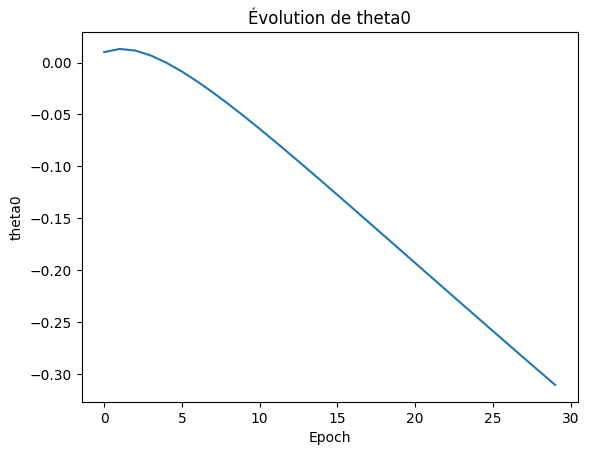

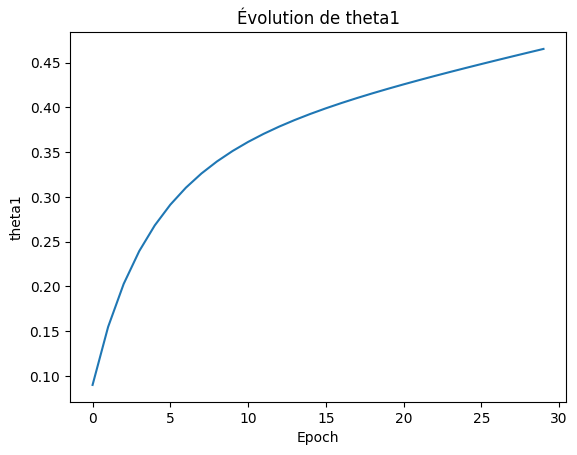

In [ ]:
plt.figure()
plt.plot(history[:,0])
plt.title('Évolution de theta0')
plt.xlabel('Epoch')
plt.ylabel('theta0')
plt.show()

plt.figure()
plt.plot(history[:,1])
plt.title('Évolution de theta1')
plt.xlabel('Epoch')
plt.ylabel('theta1')
plt.show()

### Évolution d'une perte approximative (log loss moyenne)

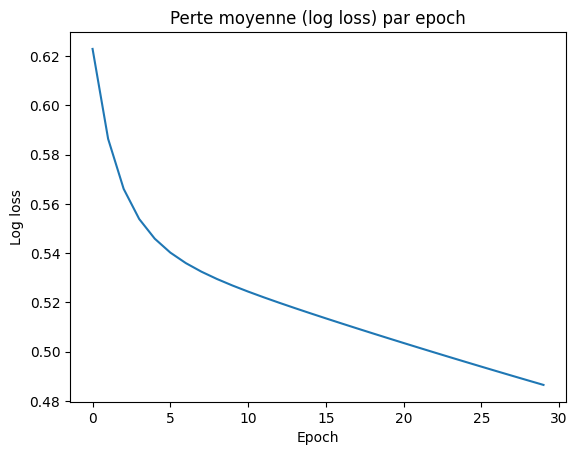

In [ ]:
import math

def sigmoid(z):
    return 1/(1+math.exp(-z))

def log_loss_mean(theta0_v, theta1_v, X, Y):
    losses = []
    for xi, yi in zip(X, Y):
        z = theta0_v + theta1_v*xi
        p = sigmoid(z)
        p = min(max(p, 1e-12), 1-1e-12)
        losses.append(- (yi*math.log(p) + (1-yi)*math.log(1-p)))
    return sum(losses)/len(losses)

losses = [log_loss_mean(t0_v, t1_v, X, Y) for t0_v, t1_v in history]

plt.figure()
plt.plot(losses)
plt.title('Perte moyenne (log loss) par epoch')
plt.xlabel('Epoch')
plt.ylabel('Log loss')
plt.show()

## Vérification : gradients symboliques vs approximation numérique (difference)

In [ ]:
def numeric_grad(fun, params, idx, eps=1e-6):
    p = list(params)
    p[idx] += eps
    f1 = fun(*p)
    p[idx] -= 2*eps
    f2 = fun(*p)
    return (f1 - f2) / (2*eps)

# convertir la perte symbolique Jlog en fonction numérique
loss_one = sp.lambdify((theta0, theta1, x, y), Jlog, 'numpy')

params = (0.1, -0.2, 2.0, 1.0)

g0_sym = float(sp.N(dJlog_dtheta0_s.subs({theta0:params[0], theta1:params[1], x:params[2], y:params[3]})))
g0_num = numeric_grad(lambda a,b,c,d: loss_one(a,b,c,d), params, 0)

g0_sym, g0_num, abs(g0_sym-g0_num)

(-0.5744425168116589, -0.5744425167208966, 9.076228657534102e-11)